In [117]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [118]:
# function for averaging a vector
# vec=[x1,x2,x3,x4,x5,x6,...]

def aver(vec,avg):
    res=np.zeros(len(vec))
    for i,j in enumerate(vec):
        if i<avg: res[i]=np.nan
        else:
            res[i]=round(vec[i-avg:i].sum()/avg,2)
    return res

In [119]:
data=pd.read_csv('raw_data/BTC_regression_data3.csv',index_col='Date')
data.index=pd.to_datetime(data.index,format='%Y-%m-%d')
data.rename(columns={'M2(Not seasonally adjusted)[1e+09 USD]':'M2'},inplace=True)
data.head(10)

,BTC price [USD],Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,M2,btc search interest
Date,,,,,,,,
2014-12-01,370.0,0.06,1332.5,68.98,2053.44,79098.0,11747.9,3
2014-12-02,378.0,15.01,1314.7,66.99,2066.55,99419.0,11747.9,3
2014-12-03,378.0,0.55,1325.8,67.30,2074.33,99419.0,11747.9,3
2014-12-04,377.1,0.01,1324.2,66.73,2071.92,99419.0,11747.9,3
2014-12-05,377.1,0.00,1310.8,65.89,2075.37,90900.0,11747.9,3
2014-12-06,378.0,0.02,1310.8,65.89,2075.37,90900.0,11747.9,3
2014-12-07,378.0,0.00,1310.8,65.89,2075.37,90900.0,11747.9,3
2014-12-08,375.0,0.24,1314.4,63.13,2060.31,90746.0,11747.9,3
2014-12-09,375.0,0.00,1350.2,63.74,2059.82,90746.0,11747.9,3


In [120]:
data['tomorrow btc price']=np.hstack((data['BTC price [USD]'].iloc[1:].values,np.nan))
# data['1Day before btc price']=np.hstack((np.nan,data['BTC price [USD]'].iloc[:-1].values))
# data['2Day before btc price']=np.hstack((np.nan*np.ones(2),data['BTC price [USD]'].iloc[:-2].values))
# data['3Day before btc price']=np.hstack((np.nan*np.ones(3),data['BTC price [USD]'].iloc[:-3].values))
# data['1 week before btc price']=np.hstack((np.nan*np.ones(7),data['BTC price [USD]'].iloc[:-7].values))
# data['average 7 day btc price']=aver(data['BTC price [USD]'].values,7)

In [121]:
# col_list=data.columns[:8].tolist()
# col_list_insert=data.columns[-4:]
# col_list_firt=data.columns[8]
# for i,j in enumerate(col_list_insert,start=1):
#     col_list.insert(i,j)

# col_list.insert(0,'tomorrow btc price')    
    
# data=data[col_list]
data.rename(columns={'BTC price [USD]':'today btc price'},inplace=True)

In [122]:
data.head(10)

,today btc price,Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,M2,btc search interest,tomorrow btc price
Date,,,,,,,,,
2014-12-01,370.0,0.06,1332.5,68.98,2053.44,79098.0,11747.9,3,378.0
2014-12-02,378.0,15.01,1314.7,66.99,2066.55,99419.0,11747.9,3,378.0
2014-12-03,378.0,0.55,1325.8,67.30,2074.33,99419.0,11747.9,3,377.1
2014-12-04,377.1,0.01,1324.2,66.73,2071.92,99419.0,11747.9,3,377.1
2014-12-05,377.1,0.00,1310.8,65.89,2075.37,90900.0,11747.9,3,378.0
2014-12-06,378.0,0.02,1310.8,65.89,2075.37,90900.0,11747.9,3,378.0
2014-12-07,378.0,0.00,1310.8,65.89,2075.37,90900.0,11747.9,3,375.0
2014-12-08,375.0,0.24,1314.4,63.13,2060.31,90746.0,11747.9,3,375.0
2014-12-09,375.0,0.00,1350.2,63.74,2059.82,90746.0,11747.9,3,360.5


In [129]:
# data = data.iloc[7:,:]
y=data.iloc[:-300,:]['tomorrow btc price']
X=data.iloc[:-300,:-1]


In [130]:
depths=np.arange(2,22,1)
features=np.arange(2,X.shape[1]+1,1)
trees=500
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, shuffle=True)

RMSE_res_test=pd.DataFrame(columns=depths,index=features)
RMSE_res_test.columns.name='tree max depth'
RMSE_res_test.index.name='number of feature in random forest'

# RMSE_res_train=pd.DataFrame(columns=depths,index=features)
# RMSE_res_train.columns.name='tree max depth'
# RMSE_res_train.index.name='number of feature in random forest'

for d in depths:
    RMSE_test=[]
#     RMSE_train=[]
    for f in features:
        model=RandomForestRegressor(n_estimators=trees,max_depth=d,max_features=f)
        model.fit(X_train,y_train)
        y_pred_test=model.predict(X_test)
#         y_pred_train=model.predict(X_train)
        RMSE_test.append(int(mean_squared_error(y_test,y_pred_test,squared=False)))
#         RMSE_train.append(int(mean_squared_error(y_train,y_pred_train,squared=False)))
    RMSE_res_test[d]=RMSE_test
#     RMSE_res_train[d]=RMSE_train

In [138]:
max_depth_min=RMSE_res_test.min().idxmin()
feature_min=RMSE_res_test.loc[:,max_depth_min].idxmin()

RMSE_res_test.loc[feature_min,max_depth_min]
print(max_depth_min,feature_min)
RMSE_res_test

16 8


tree max depth,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
number of feature in random forest,,,,,,,,,,,,,,,,,,,,
2,1083,736,557,460,416,398,381,391,379,385,379,398,380,384,385,384,384,396,391,387
3,926,574,416,365,340,334,342,332,331,324,336,335,327,336,338,327,332,328,334,329
4,821,490,378,319,315,316,323,312,319,311,319,318,322,320,316,316,321,314,318,311
5,774,439,337,316,320,315,314,311,320,311,306,304,313,309,318,313,309,311,310,311
6,746,409,329,324,306,316,318,311,307,310,309,313,309,308,309,303,313,314,312,308
7,762,387,320,309,308,307,309,306,306,305,305,304,299,303,307,303,304,301,305,306
8,790,393,317,301,304,301,301,299,302,303,306,301,303,299,296,306,297,305,301,305


In [139]:
model=RandomForestRegressor(n_estimators=trees,max_depth=9,max_features=8)
model.fit(X,y)

RandomForestRegressor(max_depth=9, max_features=8, n_estimators=500)

In [142]:
y_valid=data.iloc[-300:,:]['tomorrow btc price']
X_valid=data.iloc[-300:,:-1]
y_pred_valid=model.predict(X_valid)


In [143]:
analysis=pd.DataFrame(data=np.hstack( (y_valid.values.reshape(-1,1),
                                       y_pred_valid.reshape(-1,1),
                                       X_valid['today btc price'].values.reshape(-1,1))),
             columns=['true tomorrow price','predicted tomorrow','today price'],
            index=y_valid.index)
analysis.sort_index(inplace=True)
analysis

,true tomorrow price,predicted tomorrow,today price
Date,,,
2019-07-20,10590.70,10753.448964,10761.03
2019-07-21,10323.39,10720.584891,10590.70
2019-07-22,9840.12,10736.640480,10323.39
2019-07-23,9772.60,10162.817714,9840.12
2019-07-24,9883.33,10110.306335,9772.60
...,...,...,...
2020-05-10,8572.40,8818.722782,8729.86
2020-05-11,8821.42,8710.431242,8572.40
2020-05-12,9321.26,8880.627622,8821.42


In [144]:
analysis['true dir']=(analysis.iloc[:,0]-analysis.iloc[:,2]).apply(lambda x: 1 if x>0 else 0)
analysis['pred dir']=(analysis.iloc[:,1]-analysis.iloc[:,2]).apply(lambda x: 1 if x>0 else 0)
analysis

,true tomorrow price,predicted tomorrow,today price,true dir,pred dir
Date,,,,,
2019-07-20,10590.70,10753.448964,10761.03,0,0
2019-07-21,10323.39,10720.584891,10590.70,0,1
2019-07-22,9840.12,10736.640480,10323.39,0,1
2019-07-23,9772.60,10162.817714,9840.12,0,1
2019-07-24,9883.33,10110.306335,9772.60,1,1
...,...,...,...,...,...
2020-05-10,8572.40,8818.722782,8729.86,0,1
2020-05-11,8821.42,8710.431242,8572.40,1,1
2020-05-12,9321.26,8880.627622,8821.42,1,1


In [146]:
confusion_matrix(analysis['true dir'],analysis['pred dir'])
# accuracy_score(analysis['true dir'],analysis['pred dir'])

array([[ 43, 113],
       [ 40, 104]], dtype=int64)

In [6]:
# data['price dir']=(data.iloc[:,0]-data.iloc[:,1]).apply(lambda x: 1 if x>0 else -1)
# data['price dir t-y']=(data.iloc[:,1]-data.iloc[:,2]).apply(lambda x: 1 if x>0 else -1)
# data['price dir t-2y']=(data.iloc[:,1]-data.iloc[:,3]).apply(lambda x: 1 if x>0 else -1)
# data['price dir t-3y']=(data.iloc[:,1]-data.iloc[:,4]).apply(lambda x: 1 if x>0 else -1)
# data['price dir t-w']=(data.iloc[:,1]-data.iloc[:,5]).apply(lambda x: 1 if x>0 else -1)

data['price dir']=(data.iloc[:,0]-data.iloc[:,1]).apply(lambda x: 1 if x>0 else -1)
data['price change t-y']=(data.iloc[:,1]-data.iloc[:,2])/data.iloc[:,2]
data['price change t-2y']=(data.iloc[:,1]-data.iloc[:,3])/data.iloc[:,3]
data['price change t-3y']=(data.iloc[:,1]-data.iloc[:,4])/data.iloc[:,4]
data['price change t-w']=(data.iloc[:,1]-data.iloc[:,5])/data.iloc[:,5]

In [7]:
data = data.iloc[7:,:]
data

,tomorrow btc price,today btc price,1Day before btc price,2Day before btc price,3Day before btc price,1 week before btc price,Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,M2,btc search interest,price dir,price change t-y,price change t-2y,price change t-3y,price change t-w
Date,,,,,,,,,,,,,,,,,,
2014-12-08,375.00,375.00,378.00,378.00,377.10,370.00,0.24,1314.40,63.13,2060.31,90746.0,11747.9,3,-1,-0.007937,-0.007937,-0.005569,0.013514
2014-12-09,360.50,375.00,375.00,378.00,378.00,378.00,0.00,1350.20,63.74,2059.82,90746.0,11747.9,3,-1,0.000000,-0.007937,-0.007937,-0.007937
2014-12-10,360.50,360.50,375.00,375.00,378.00,378.00,0.02,1345.50,60.99,2026.14,90746.0,11747.9,3,-1,-0.038667,-0.038667,-0.046296,-0.046296
2014-12-11,350.00,360.50,360.50,375.00,375.00,377.10,0.00,1342.30,60.01,2035.33,84005.0,11747.9,3,-1,0.000000,-0.038667,-0.038667,-0.044020
2014-12-12,350.00,350.00,360.50,360.50,375.00,377.10,3.15,1333.50,57.81,2002.33,84005.0,11747.9,3,-1,-0.029126,-0.029126,-0.066667,-0.071864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-10,8572.40,8729.86,9537.21,9810.00,10004.77,8909.95,40481.79,1713.90,24.73,2929.80,286789.0,17269.8,19,-1,-0.084653,-0.110106,-0.127430,-0.020212
2020-05-11,8821.42,8572.40,8729.86,9537.21,9810.00,8883.53,36356.85,1698.00,24.02,2930.19,286789.0,17269.8,19,1,-0.018037,-0.101163,-0.126157,-0.035023
2020-05-12,9321.26,8821.42,8572.40,8729.86,9537.21,9028.79,19825.54,1706.80,24.02,2870.12,286789.0,17269.8,19,1,0.029049,0.010488,-0.075052,-0.022968


In [8]:
# size=data.iloc[1:,5:].shape[1]
# f_row=np.nan*np.ones(size) 
# del_time=np.vstack((f_row,data.iloc[:-1,5:]))

# data.iloc[:,5:]=del_time
# data=data.iloc[7:,:]

In [9]:
y=data.iloc[:-100,:]['price dir']
X=data.iloc[:-100,6:]
X.drop('price dir',axis=1,inplace=True)

In [10]:
y

Date
2014-12-08   -1
2014-12-09   -1
2014-12-10   -1
2014-12-11   -1
2014-12-12   -1
             ..
2020-01-31    1
2020-02-01   -1
2020-02-02   -1
2020-02-03   -1
2020-02-04    1
Name: price dir, Length: 1873, dtype: int64

In [11]:
depths=np.arange(2,22,1)
features=np.arange(2,X.shape[1]+1,1)
trees=500
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, shuffle=True)

RMSE_res_test=pd.DataFrame(columns=depths,index=features)
RMSE_res_test.columns.name='tree max depth'
RMSE_res_test.index.name='number of feature in random forest'

RMSE_res_train=pd.DataFrame(columns=depths,index=features)
RMSE_res_train.columns.name='tree max depth'
RMSE_res_train.index.name='number of feature in random forest'

for d in depths:
    RMSE_test=[]
    RMSE_train=[]
    for f in features:
        model=RandomForestClassifier(n_estimators=trees,max_depth=d,max_features=f)
        model.fit(X_train,y_train)
        y_pred_test=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        RMSE_test.append(accuracy_score(y_test,y_pred_test))
#         RMSE_train.append(accuracy_score(y_test,y_pred_test))
    RMSE_res_test[d]=RMSE_test
#     RMSE_res_train[d]=RMSE_train


In [86]:
RMSE_res_test

tree max depth,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
number of feature in random forest,,,,,,,,,,,,,,,,,,,,
2,942,613,509,468,462,452,452,448,451,446,458,443,449,451,451,455,448,449,453,449
3,886,566,480,454,445,441,436,448,433,445,440,438,437,444,431,440,444,438,436,437
4,862,544,464,446,440,436,432,439,435,437,429,436,434,432,436,435,429,437,433,439
5,860,536,460,441,433,433,430,432,426,429,431,433,442,429,437,427,431,429,432,435
6,876,533,458,432,435,431,424,434,435,428,428,431,427,424,429,431,427,428,433,428
7,865,525,451,433,426,432,421,426,425,428,433,425,423,427,425,433,434,426,428,424
8,864,529,439,427,421,424,426,428,422,421,428,423,427,421,427,429,425,429,423,430
9,865,522,442,420,421,429,426,420,425,426,422,427,421,421,423,422,425,417,422,427
10,864,522,439,425,417,422,425,424,414,420,420,422,420,426,423,419,424,420,425,426


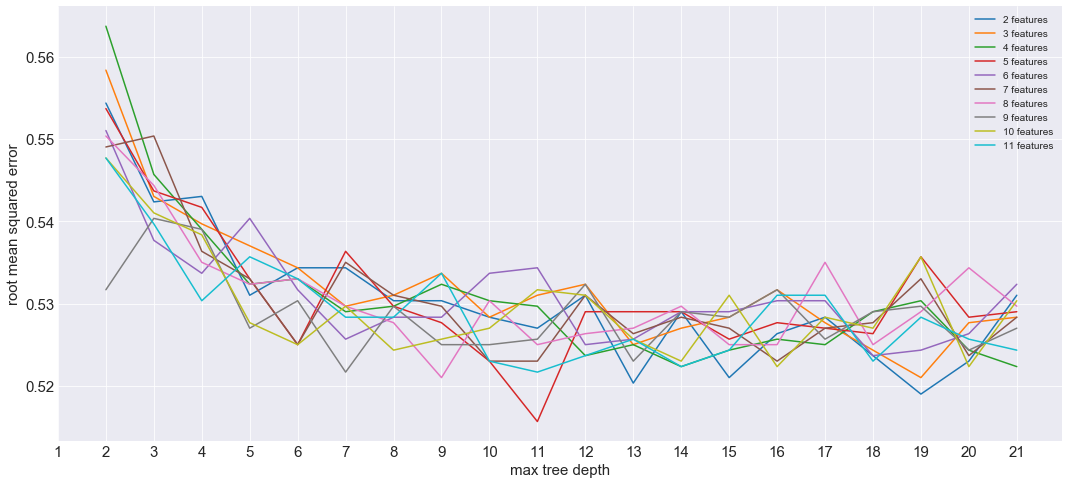

In [13]:
plt.figure(figsize=(18,8))
for i in RMSE_res_test.index:
    plt.plot(depths,RMSE_res_test.loc[i,:],label='{} features'.format(i))
    
plt.xticks(ticks=np.arange(1,22,1),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('max tree depth',fontsize=15)
plt.ylabel('root mean squared error',fontsize=15)
plt.legend()
plt.show()

In [14]:
X_test = data.iloc[-100:,6:].drop('price dir',axis=1)
y_test = data.iloc[-100:,:]['price dir']


model=RandomForestClassifier(n_estimators=500,max_depth=4,max_features=5)
model.fit(X,y)
y_pred=model.predict(X_test)


In [15]:
analysis=pd.DataFrame(data=np.hstack( (y_test.values.reshape(-1,1),y_pred.reshape(-1,1))),
             columns=['true dir','predicted dir'],
            index=y_test.index)
analysis.sort_index(inplace=True)
# analysis['difference absolute']=abs(analysis['true price']-analysis['predicted'])
# analysis['difference']=analysis['true price']-analysis['predicted']
analysis.head(15)
# analysis['difference absolute'].nlargest(10)

,true dir,predicted dir
Date,,
2020-02-05,1,-1
2020-02-06,1,-1
2020-02-07,1,-1
2020-02-08,1,-1
2020-02-09,-1,-1
2020-02-10,1,-1
2020-02-11,1,-1
2020-02-12,-1,-1
2020-02-13,1,1


In [16]:
analysis['predicted dir'].value_counts()

-1    70
 1    30
Name: predicted dir, dtype: int64

In [17]:
data2=data.copy()
data2
# data2.iloc[:,1]=(data2.iloc[:,0]-data2.iloc[:,1])/data2.iloc[:,0]

,tomorrow btc price,today btc price,1Day before btc price,2Day before btc price,3Day before btc price,1 week before btc price,Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,M2,btc search interest,price dir,price change t-y,price change t-2y,price change t-3y,price change t-w
Date,,,,,,,,,,,,,,,,,,
2014-12-08,375.00,375.00,378.00,378.00,377.10,370.00,0.24,1314.40,63.13,2060.31,90746.0,11747.9,3,-1,-0.007937,-0.007937,-0.005569,0.013514
2014-12-09,360.50,375.00,375.00,378.00,378.00,378.00,0.00,1350.20,63.74,2059.82,90746.0,11747.9,3,-1,0.000000,-0.007937,-0.007937,-0.007937
2014-12-10,360.50,360.50,375.00,375.00,378.00,378.00,0.02,1345.50,60.99,2026.14,90746.0,11747.9,3,-1,-0.038667,-0.038667,-0.046296,-0.046296
2014-12-11,350.00,360.50,360.50,375.00,375.00,377.10,0.00,1342.30,60.01,2035.33,84005.0,11747.9,3,-1,0.000000,-0.038667,-0.038667,-0.044020
2014-12-12,350.00,350.00,360.50,360.50,375.00,377.10,3.15,1333.50,57.81,2002.33,84005.0,11747.9,3,-1,-0.029126,-0.029126,-0.066667,-0.071864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-10,8572.40,8729.86,9537.21,9810.00,10004.77,8909.95,40481.79,1713.90,24.73,2929.80,286789.0,17269.8,19,-1,-0.084653,-0.110106,-0.127430,-0.020212
2020-05-11,8821.42,8572.40,8729.86,9537.21,9810.00,8883.53,36356.85,1698.00,24.02,2930.19,286789.0,17269.8,19,1,-0.018037,-0.101163,-0.126157,-0.035023
2020-05-12,9321.26,8821.42,8572.40,8729.86,9537.21,9028.79,19825.54,1706.80,24.02,2870.12,286789.0,17269.8,19,1,0.029049,0.010488,-0.075052,-0.022968


In [18]:
data2['price dir today']=(data2.iloc[:,0]-data2.iloc[:,1])/data2.iloc[:,0]
data2['price dir today']=(data2.iloc[:,0]-data2.iloc[:,1])/data2.iloc[:,0]

In [19]:
data2.iloc[1000:1020,:]

,tomorrow btc price,today btc price,1Day before btc price,2Day before btc price,3Day before btc price,1 week before btc price,Volume BTC,Gold price[USD],Oil WTI price[USD],SP500 close index,BTC n-transactions,M2,btc search interest,price dir,price change t-y,price change t-2y,price change t-3y,price change t-w,price dir today
Date,,,,,,,,,,,,,,,,,,,
2017-09-03,4498.25,4626.05,4649.99,4947.99,4743.94,4340.11,11393.09,1341.22,47.32,2476.55,236811.0,13696.5,21,-1,-0.005148,-0.065065,-0.024851,0.065883,-0.028411
2017-09-04,4432.51,4498.25,4626.05,4649.99,4947.99,4384.99,20043.59,1338.08,47.32,2476.55,236811.0,13696.5,21,-1,-0.027626,-0.032632,-0.090893,0.025829,-0.014831
2017-09-05,4616.18,4432.51,4498.25,4626.05,4649.99,4599.00,17081.16,1399.20,48.63,2457.85,277948.0,13696.5,21,1,-0.014615,-0.041837,-0.046770,-0.036201,0.039788
2017-09-06,4624.18,4616.18,4432.51,4498.25,4626.05,4581.98,15975.31,1393.90,49.13,2465.54,277948.0,13696.5,21,1,0.041437,0.026217,-0.002134,0.007464,0.001730
2017-09-07,4350.00,4624.18,4616.18,4432.51,4498.25,4743.94,8402.48,1406.00,49.10,2465.10,277948.0,13696.5,21,-1,0.001733,0.043242,0.027995,-0.025245,-0.063030
2017-09-08,4334.36,4350.00,4624.18,4616.18,4432.51,4947.99,21495.34,1407.30,47.44,2461.43,279488.0,13696.5,21,-1,-0.059293,-0.057662,-0.018615,-0.120855,-0.003608
2017-09-09,4251.36,4334.36,4350.00,4624.18,4616.18,4649.99,9821.45,1407.30,47.44,2461.43,279488.0,13696.5,21,-1,-0.003595,-0.062675,-0.061050,-0.067878,-0.019523
2017-09-10,4210.72,4251.36,4334.36,4350.00,4624.18,4626.05,10061.08,1407.30,47.44,2461.43,279488.0,13696.5,21,-1,-0.019149,-0.022676,-0.080624,-0.080996,-0.009652
2017-09-11,4164.52,4210.72,4251.36,4334.36,4350.00,4498.25,9037.83,1392.10,48.06,2488.11,253492.0,13696.5,21,-1,-0.009559,-0.028526,-0.032018,-0.063920,-0.011094
